<a href="https://colab.research.google.com/github/Dagnne/TalentoTechDag/blob/main/Dagnne_Limpieza_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?


#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")


In [113]:
# Importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
ruta = '/content/drive/MyDrive/Analisis de Datos basico Talento Tech/dataset_banco.csv'
data = pd.read_csv(ruta) # La "ruta" se puede definir como ruta o path y los parentesis () no influyen para correr el codigo

#3. Una mirada al dataset
##Librerias

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [116]:
print(data.shape) # Este comando me muestra los datos del contenido del shape (cantidad de filas y columnas)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [117]:
# Veamos las variables categoricas y numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.


## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:



In [118]:
data.isna().sum() # Este comando me sirve para detectar valores faltantes en los campos columnas

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

In [119]:
data.dropna(inplace=True) # Que pasa si coloco False en lugar de True
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:



# Ciclo FOR

for col in cols_cat:: Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.



In [120]:
# Conteo de los niveles en las diferentes columnas categoricas
cols_cat = ['job','marital','education', 'default', 'housing',
            'loan', 'contact','month', 'poutcome', 'y']

for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


In [121]:
data.describe() # Nos da una descripcion general de nuestra DataFrame como moda, promedio, desviacion estandar, maximo, minimo y porcentaje en cuartiles

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Analisis de la descripcion anterior

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservamos todas las columnas numéricas.

La desviación estándar es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.


In [122]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = data['pdays'].mean()  # Cuando no se coloca el parentesis de mean, muestra el promedio de las 4 primeras y 4 ultimas filas

print('Prom_dias_contacto', media)

Prom_dias_contacto 40.17822461123277


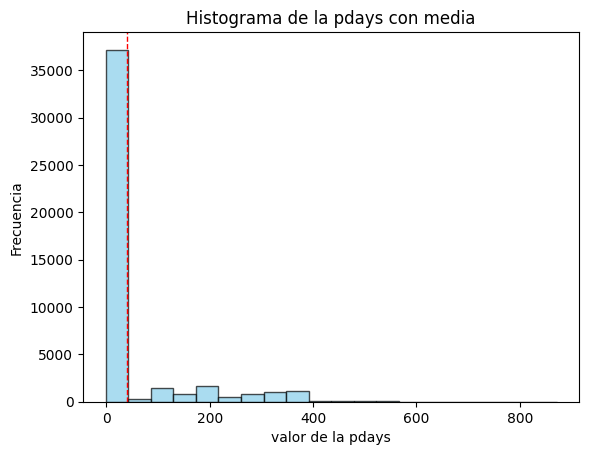

In [123]:
# Graficar un histograma del atributo pdays
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con media')

# Mostrar la grafica
plt.show()

In [124]:
# Calcula la desviacion estandar del atributo "pdays"
std = data['pdays'].std()
print("Desviacion estandar de la pdays:", std) # std = Desviacion estandar segun la nomenclatura del codigo como se ve en el comando df.describe()

Desviacion estandar de la pdays: 100.10328306134589


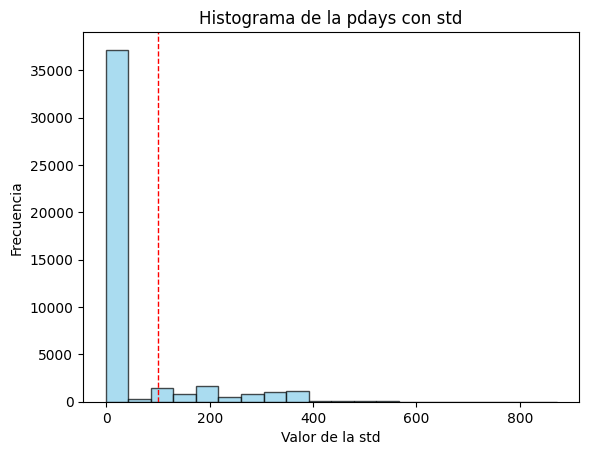

In [125]:
# Graficar un histograma de la std del atriburo pdays
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener la std
plt.axvline(std, color='red', linestyle='dashed', linewidth=1) # Se reemplaza media por std seguido del comando "plt.axvline" para graficar la desviacion estandar y no la media

# Etiquetas y titulo
plt.xlabel('Valor de la std')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con std')

# Mostrar la grafica
plt.show()

In [126]:
# Calcula el valor maximo del atributo "pdays"
max = data['pdays'].max()
print("Valor maximo de la pdays:", max)

Valor maximo de la pdays: 871.0


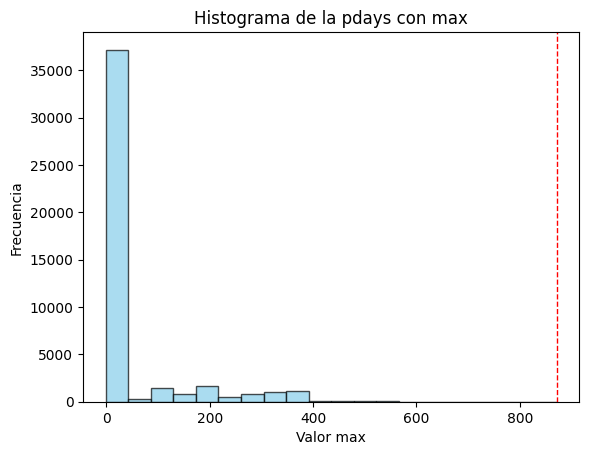

In [127]:
# Histograma valor max del atriburo pdays
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener valor max
plt.axvline(max, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('Valor max')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con max')

# Mostrar la grafica
plt.show()

In [128]:
# Conteo de valores con -1

count = data['pdays'].value_counts()[-1] # Esta linea de codigo sirve para contar la cantidad de valores iguales dentro de un mismo atributo,
# en este caso cantidad de -1

print(count)

36953


In [129]:
# Calcula el valor minimo del atributo "pdays"
min = data['pdays'].min()
print("Valor minimo de la pdays:", min)

Valor minimo de la pdays: -1.0


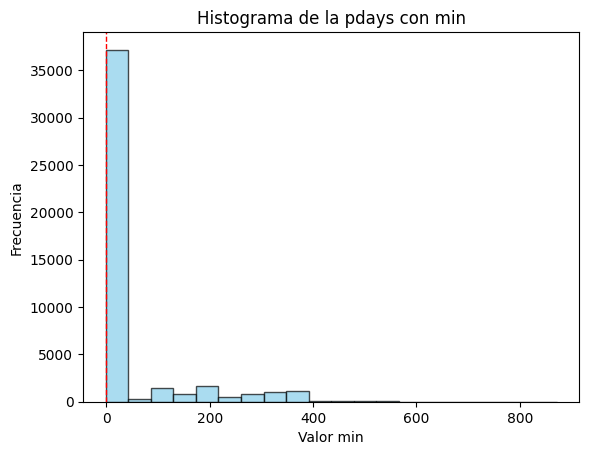

In [130]:
# Histograma valor min del atriburo pdays
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener valor max
plt.axvline(min, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('Valor min')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con min')

# Mostrar la grafica
plt.show()

#4.3 Filas repetidas


In [131]:
# Mostramos la cantidad de registros antes de aplicar una transformacion, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas:{data.shape}')
data.drop_duplicates(inplace=True)
# Mostramos la cantidad de registros despues de aplicar una transformacion, limpieza o filtro
print(f'Tamaño del set despues de eliminar las filas repetidas:{data.shape}')

Tamaño del set antes de eliminar las filas repetidas:(45207, 17)
Tamaño del set despues de eliminar las filas repetidas:(45203, 17)


#4.4 Outliers en las variables numericas

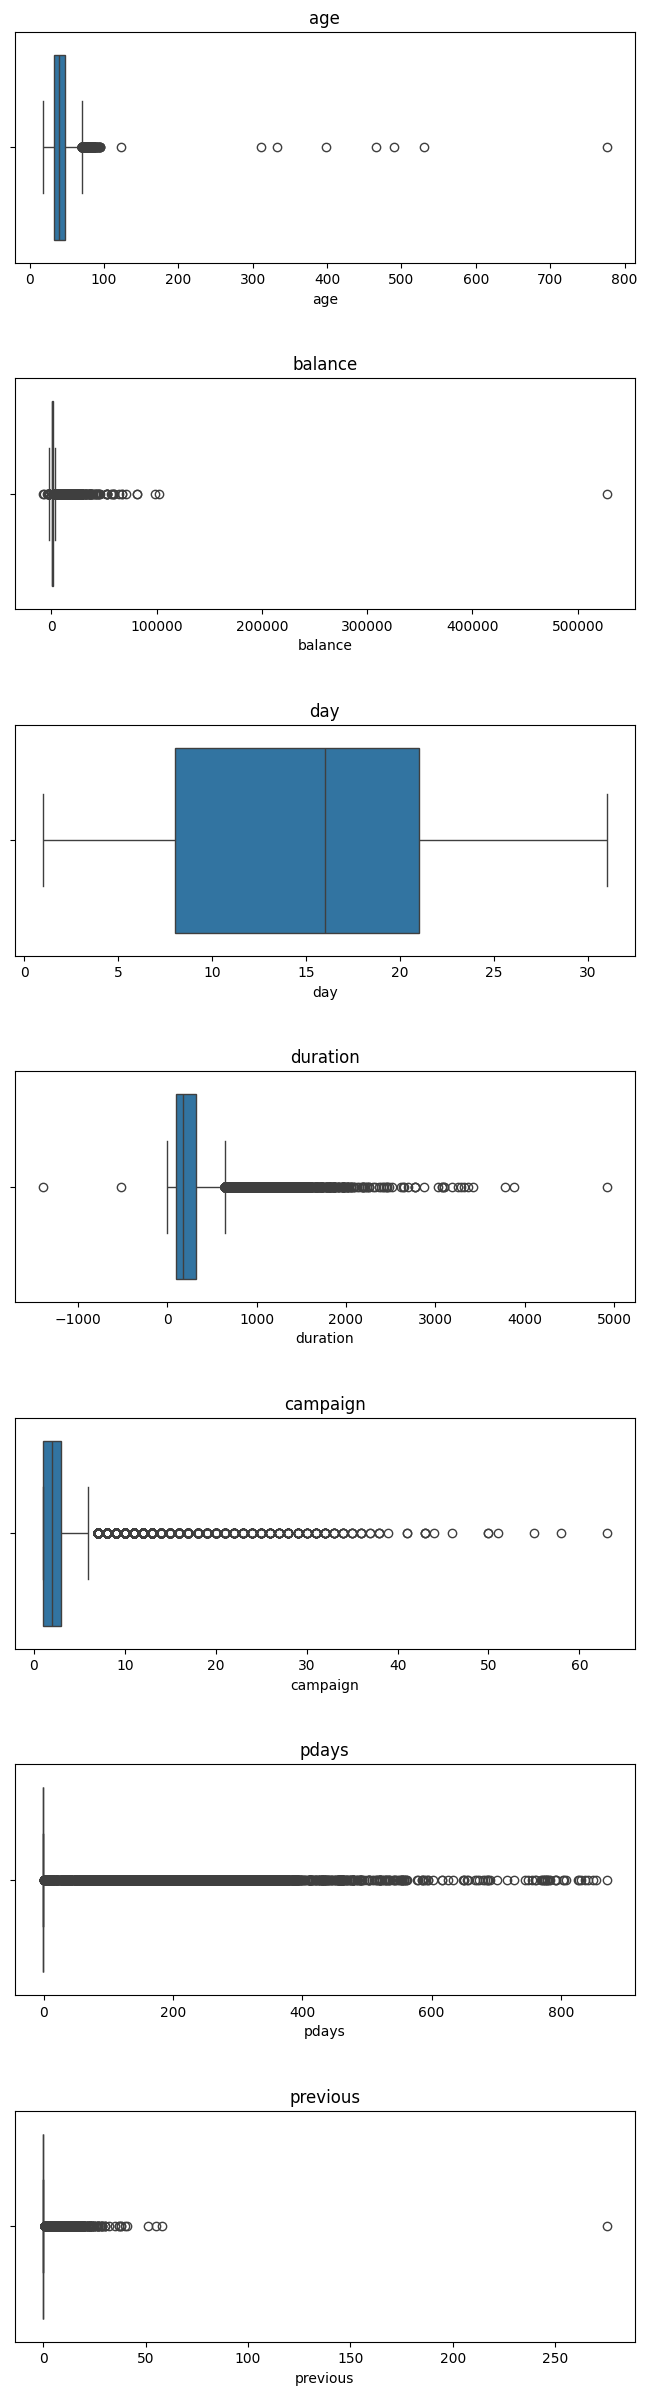

In [132]:
# Generar graficas individuales pues las variables numericas estan en rangos diferentes

cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
fig, ax =plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

# Remarks (Ovservaciones)

1. En la grafica 'age' hay valores atipicos que superan los 300 años
2. En la grafica 'pdays' hay muchos valores atipicos que llegan hasta los 871
3. En la grafica 'duration' hay ouliers con valor negativo, pese a que la duracion esta dada en segundos y el tiempo no puede ser negativo

In [133]:
# Eliminar filas con "age">100

print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['age'] > 100].index)
print(f'Tamaño del set despues de eliminar registros de edad:{data.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set despues de eliminar registros de edad:(45195, 17)


In [134]:
# Eliminar filas con "duration"<0

print(f'Tamaño del set antes de eliminar registros de duracion: {data.shape}')
data = data.drop(data[data['duration'] < 0].index)
print(f'Tamaño del set despues de eliminar registros de duracion:{data.shape}')

Tamaño del set antes de eliminar registros de duracion: (45195, 17)
Tamaño del set despues de eliminar registros de duracion:(45193, 17)


In [135]:
# Eliminar filas con "previous">100

print(f'Tamaño del set antes de eliminar registros de previous: {data.shape}')
data = data.drop(data[data['previous'] > 100].index)
print(f'Tamaño del set despues de eliminar registros de previous:{data.shape}')

Tamaño del set antes de eliminar registros de previous: (45193, 17)
Tamaño del set despues de eliminar registros de previous:(45192, 17)


#4.5 Errores tipograficos en variables categoricas

En una variable categorica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerian diferentes.

Se deben unificar estos sub-niveles

In [136]:
# Compañero
#cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
#fig.ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
#fig.subplots_adjust(hspace=1)

#for i, col in enumerate(cols_cat):
  #sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorbind', legend=False)
  #ax[i].set_title(col)
  #ax[i].tick_params(axis='x', labelrotation = 30)

<ipython-input-140-bfcb387c6c56>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
<ipython-input-140-bfcb387c6c56>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
<ipython-input-140-bfcb387c6c56>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
<ipython-input-140-bfcb387c6c56>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
<ipython-input-140-bfcb387c6c56>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
<ipython-input-140-bfcb387c6c56>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(

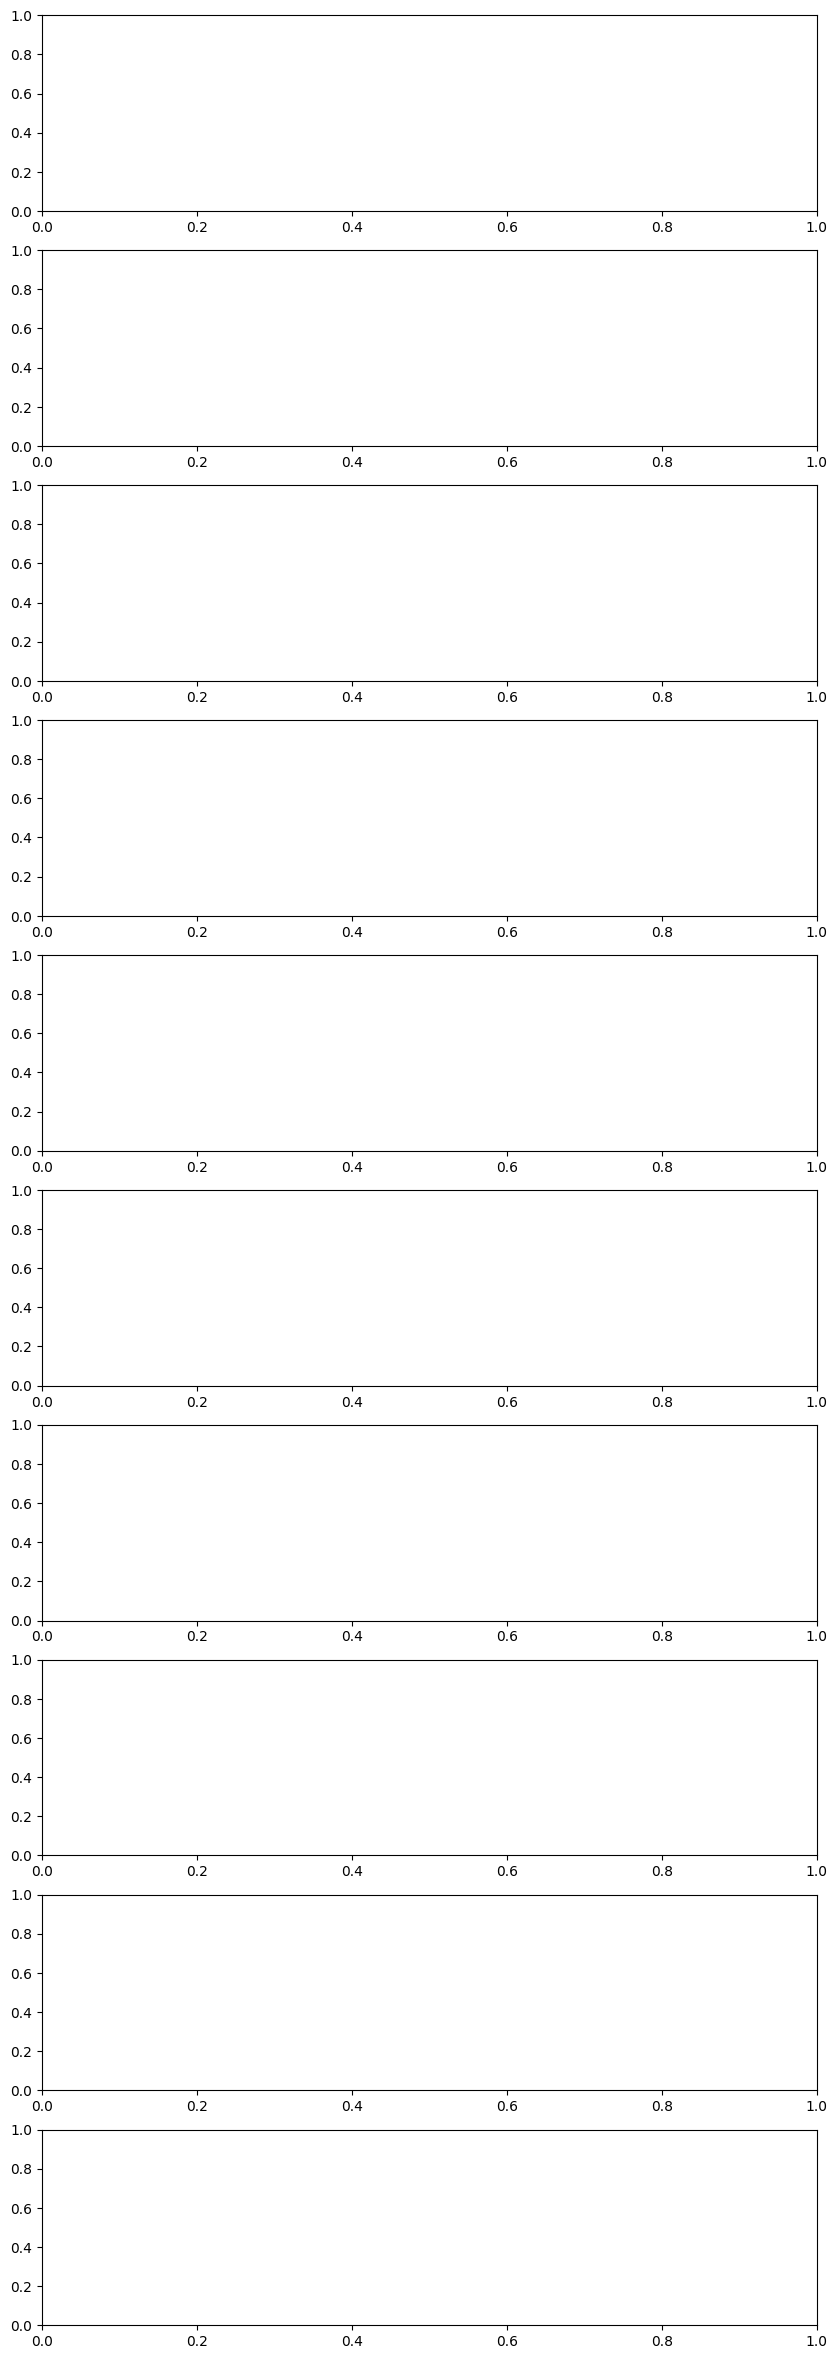

In [140]:
# Graficar los subniveles de cada variable categorica
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
fig.ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minuscula, en mayuscula o con la primera letra en mayuscula

Unifiquemos estos sub-niveles inicialmente

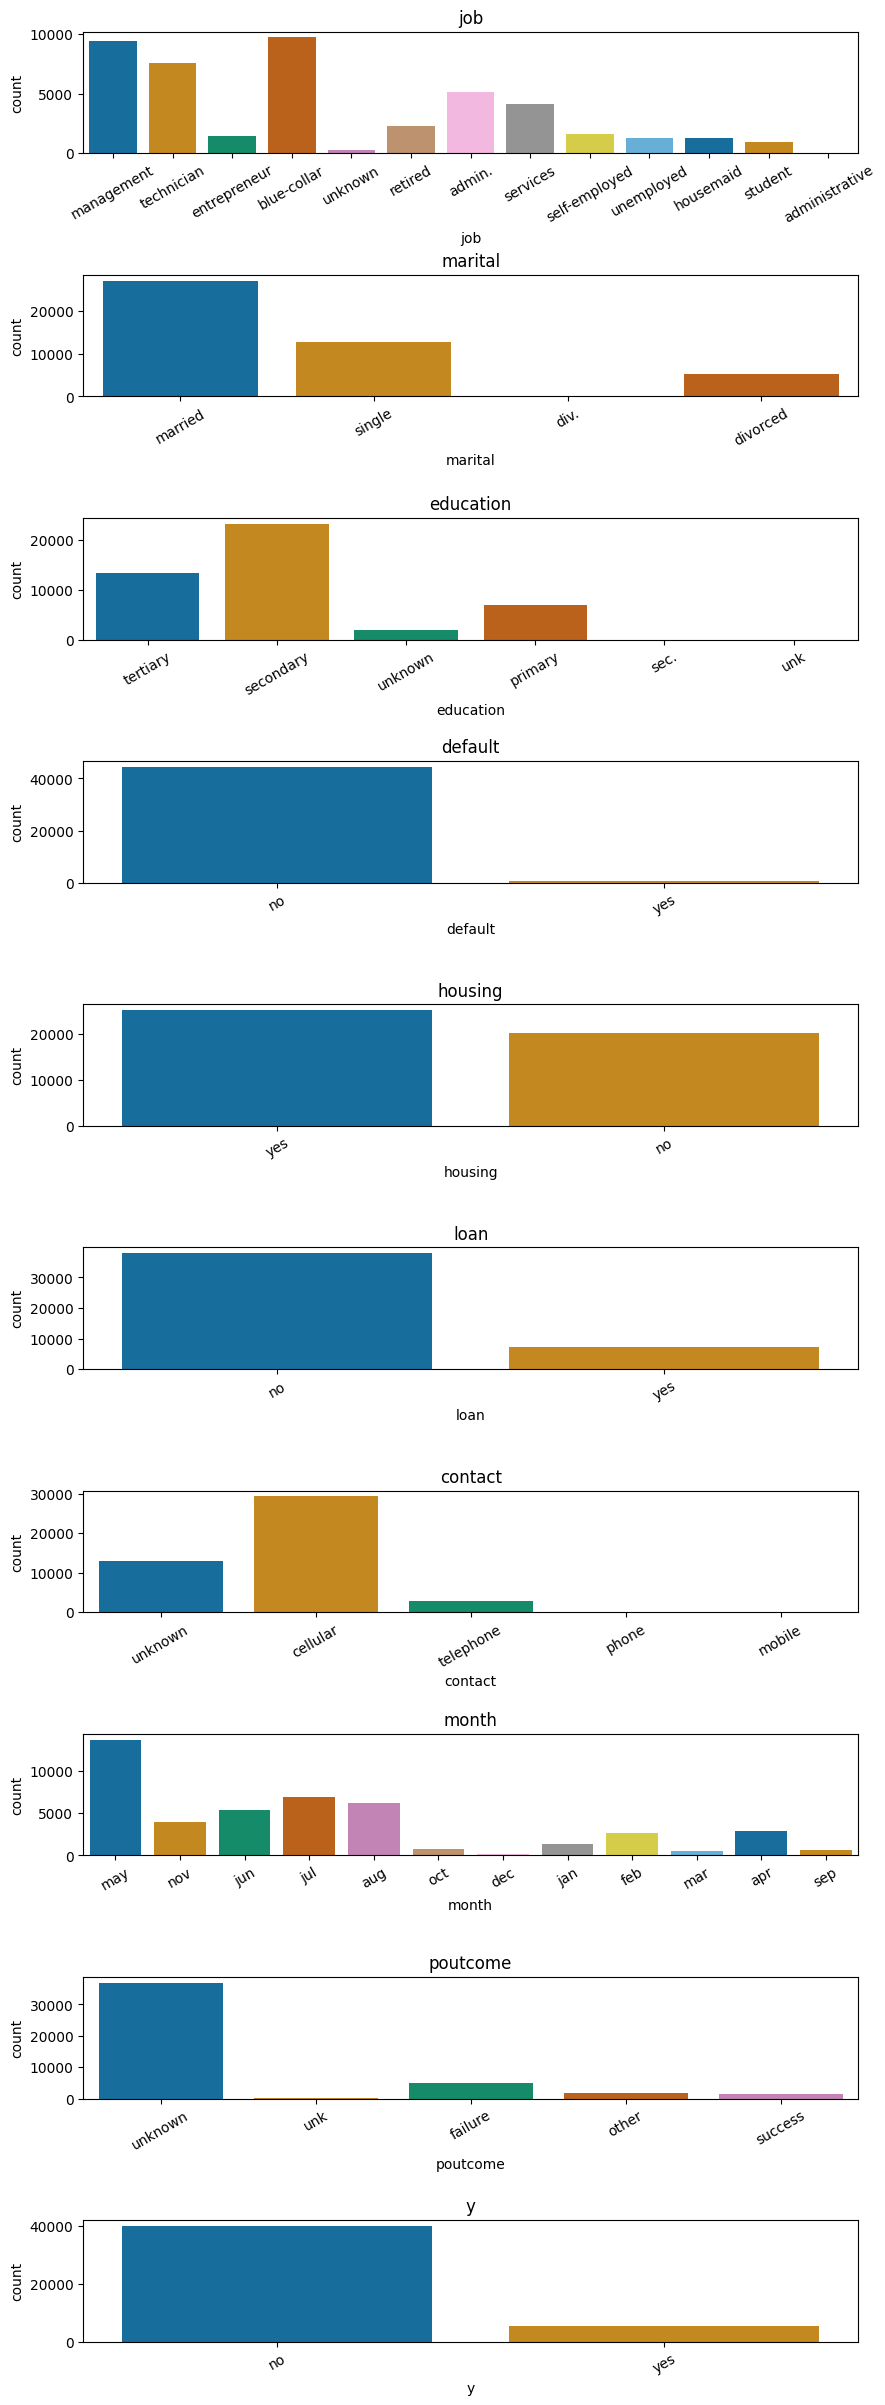

In [139]:
for column in data.columns:
  # Representar en minusculas solo si la columna es categorica
  if column in cols_cat:
    data[column] = data[column].str.lower() # Para colocar en mayusculas se reemplaza lower por upper,
    # o para colocar la primera letra en mayuscula y el resto en minusculas se coloca title

# Y generemos las graficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

In [141]:
# job: unificar admin. y administrative, administrativeistrativeistrativeistrative y administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
data['job'] = data['job'].str.replace('administrativeistrativeistrativeistrative','administrative', regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [142]:
# marital: unificar div, y divorced

print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
print(data['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [143]:
# education: unificar sec. y secondary, unk y unknown

print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [144]:
# contact: unificar telephone y phone

print(data['contact'].unique())
data.loc[data['contact']=='phone', 'contact'] = 'telephone'
data.loc[data['contact']=='mobile', 'contact'] = 'telephone'
data.loc[data['contact']=='cellular', 'contact'] = 'telephone'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'telephone']


In [145]:
print(data.shape)

(45192, 17)


¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenia 45.215 registros y 17 columnas. El dataset resultante tiene 45.192 (23 menos) filas y 17 columnas.

El set de datos ya esta listo para el **Analisis Exploratorio**

In [146]:
# El paso final es guardar el archivo en el Data Lake (lago de datos) que nos dispongan para ello
# (puede ser una carpeta en dive o en una unidad de disco duro del pc, la nube, entre otras)

#ruta = "/content/drive/MyDrive/Analisis de Datos basico Talento Tech/Data_Clean/dataset_banco_clean.csv"
#data.to_csv(ruta, index=False)

# Taller preguntas

1. ¿Cual es la edad promedio de los clientes interesados en adquirir un certificado de deposito?

2. En una grafica, establece la diferencia de ingresos entre clientes interesados y no interesados en el certificado de deposito

3. En un grafico de barras, establece la distribucion de genero entre cliente interesados en el certificado de deposito

4. ¿Cual es el nivel educativo predominante entre clientes interesados en el certificado de deposito?

5. ¿Cual es la relacion entre estado civil vs el interes en adquirir el certificado de deposito?

6. ¿Cual es la distribucion del medio de contacto mas frecuente de los clientes interesados en adquirirel certificado de deposito?

7. En un grafico de barras horizontales, responde, ¿Cual es el tipo de ocupacion de los clientes interesados en adquirir el certificado de deposito?

8. ¿Cual es la frecuencia de contacto con los clientes interesados antes de la conversion?

9. Cual es el patron temporal en los contactos que conducen a una mayor conversion de clientes?

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [148]:
# 1. Edad promedio de clientes interesados
edad_prom = data[data['y'] == 'yes']['age'].mean()
print("Edad promedio de clientes interesados:", edad_prom)

Edad promedio de clientes interesados: 41.665468306527906


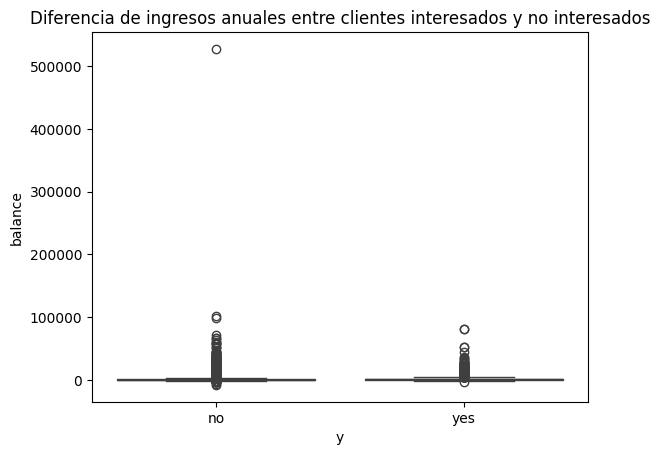

In [149]:
# 2. Diferencia de ingresos entre clientes interesados y no interesados
sns.boxplot(x='y', y='balance', data=data)
plt.title('Diferencia de ingresos anuales entre clientes interesados y no interesados')
plt.show()

In [150]:
# 3. Distribucion de genero entre clientes interesados en el certificado de deposito

#count = data['y'].value_counts()
#print('cantidad de interesados y no interesados', count)
#plt.hist(data['y'])
#plt.show()

# Filter data for customers interested in the certificate of deposit
#dist_genero = data[data['y'] == 'yes']

# Print the first few rows of the filtered DataFrame
#dist_genero.head()

count = data[data['y']== 'yes'].value_counts()
print(count)


# ¡EL CAMPO DE GENERO NO EXISTE EN EL DATAFRAME!, POR LO TANTO NO SE PUEDE REALIZAR UNA REALCION ENTRE LAS DOS VARIABLES

age  job           marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays   previous  poutcome  y  
18   student       single    primary    no        608.0   no       no    telephone  12   aug    267.0     1         -1.0    0         unknown   yes    1
46   housemaid     divorced  primary    no        2084.0  yes      no    telephone  18   jul    1081.0    2         -1.0    0         unknown   yes    1
     entrepreneur  divorced  secondary  no       -563.0   no       yes   telephone  15   jul    769.0     4         -1.0    0         unknown   yes    1
     blue-collar   single    tertiary   no        460.0   yes      no    unknown    7    may    1102.0    2         -1.0    0         unknown   yes    1
                                                  283.0   no       no    telephone  7    apr    299.0     1         -1.0    0         unknown   yes    1
                                                                                       

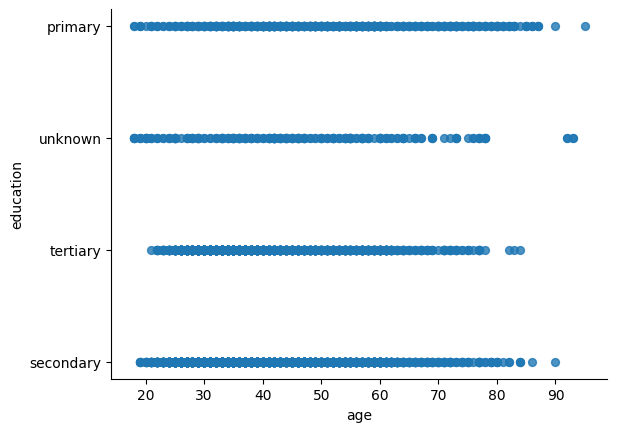

In [151]:
from matplotlib import pyplot as plt

# Esta grafica nos muestra la edad y nivel de educacion del los clientes interesados en el certificado de deposito
yes_data = data[data['y'] == 'yes'] # esta linea de codigo es la que define el subnivel
# de la categoria que se quiere visualizar especificamente, vs otras categorias
yes_data.plot(kind='scatter', x='age', y='education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


Nivel educativo predominante en interesados


<BarContainer object of 4 artists>

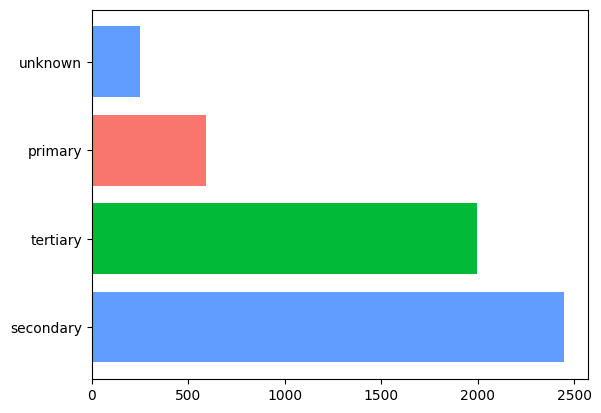

In [152]:
# 4. Nivel educativo predominante en interesados

print('Nivel educativo predominante en interesados')

import matplotlib.pyplot as plt

# Datos
y = data[data['y']=='yes']['education'].value_counts()
x = y.index.to_list()
y = y.to_list()
colores = ["#619cff", "#00ba38", "#f8766d"] # Se puede hacer personalizacion del color

# Gráfico de barras
fig, ax = plt.subplots()
ax.barh(x, width = y, color=colores)

Relacion entre estado civil e interesados


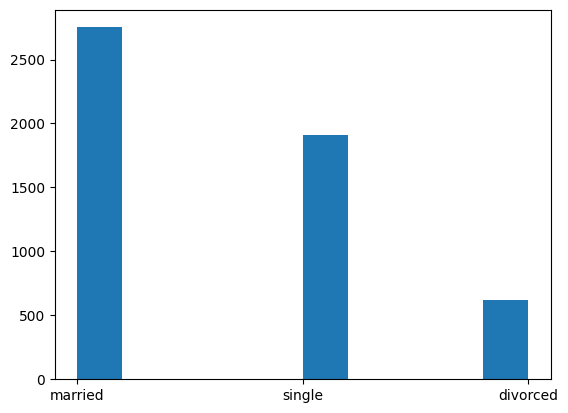

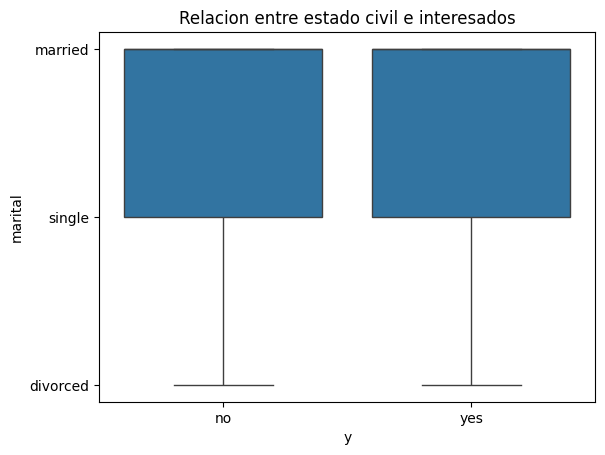

In [153]:
# 5. Relacion entre estado civil e interesados

print('Relacion entre estado civil e interesados')

data['marital'] = data['marital'].astype('str') # se debe convertir el tipo de datos (astype) de marital a string,
# para que el histograma se ejecute correctamente
plt.hist(data[data['y']=='yes']['marital'])
plt.show()

sns.boxplot(x='y', y='marital', data=data)
plt.title('Relacion entre estado civil e interesados')
plt.show()


Distribucion contacto mas frecuente de interesados


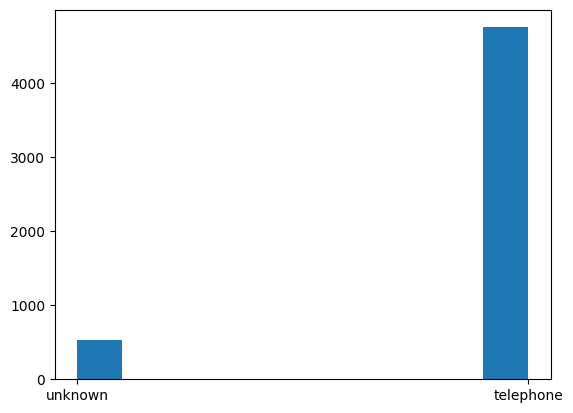

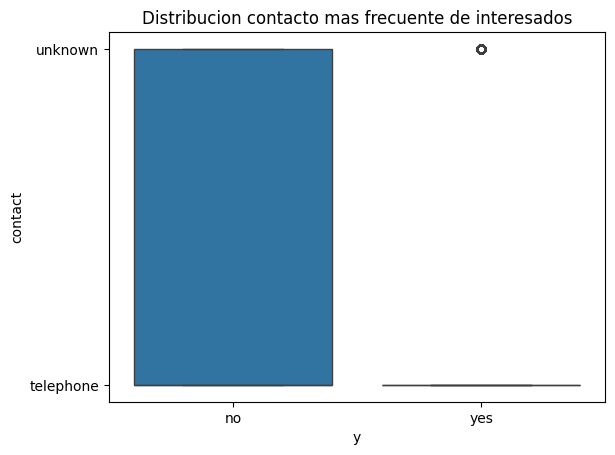

In [154]:
# 6. Distribucion contacto mas frecuente de interesados

# ¿PORQUE SOLAMENTE APARECE LA INICIAL DE LA CATEGORIA EN EL EJE CONTACTO?

print('Distribucion contacto mas frecuente de interesados')

data['contact'] = data['contact'].astype('str')
plt.hist(data[data['y']=='yes']['contact'])
plt.show()



sns.boxplot(x='y', y='contact', data=data)
plt.title('Distribucion contacto mas frecuente de interesados')
plt.show()


<BarContainer object of 12 artists>

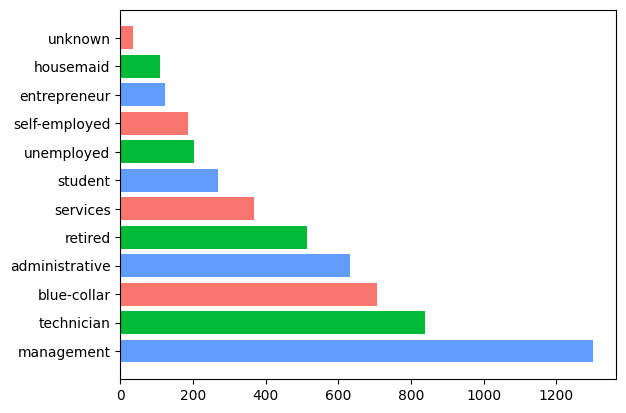

In [155]:
# 7. Ocupacion de clientes interesados

import matplotlib.pyplot as plt

# Datos
y = data[data['y']=='yes']['job'].value_counts()
x = y.index.to_list()
y = y.to_list()
colores = ["#619cff", "#00ba38", "#f8766d"]

# Gráfico de barras
fig, ax = plt.subplots()
ax.barh(x, width = y, color=colores)



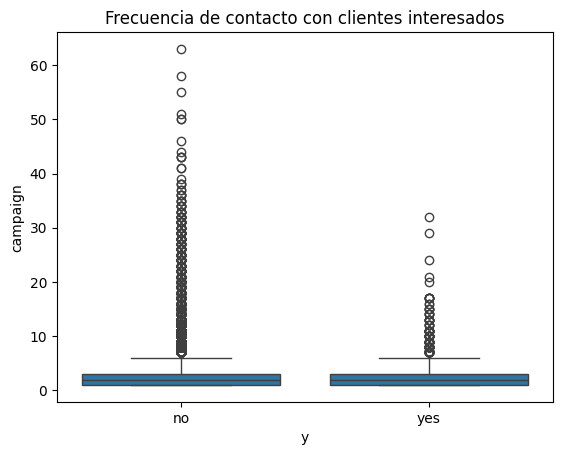

In [156]:
# 8. Frecuencia de contacto con clientes interesados (CAMPAIGN)

sns.boxplot(x='y', y='campaign', data=data)
plt.title('Frecuencia de contacto con clientes interesados')
plt.show()


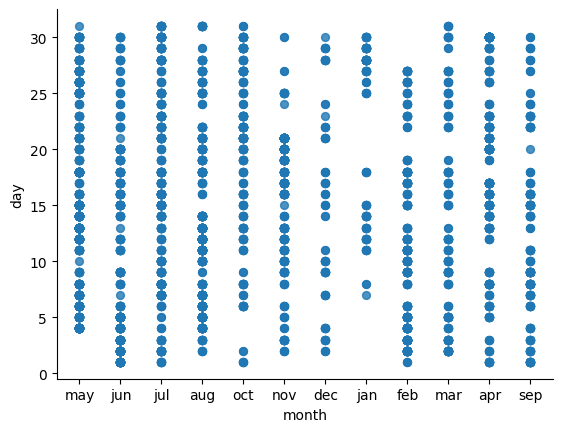

In [157]:
# 9. Patron temporal en contacto con mayos conversion de clientes
yes_data.plot(kind='scatter', x='month', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
